In [16]:
import numpy as np
import scipy.io as io
glacier_component_path='/home/shashank/Shashank_Github_Packages/old_landlab/landlab/landlab/components/glacier/glacier/'
import sys
sys.path.insert(0,glacier_component_path)
#from glacier import glacier
import glacier
from landlab import RasterModelGrid
import os 
from pygeotools.lib import iolib, geolib, malib,warplib
from imview.lib import pltlib
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib notebook

In [17]:
datadir = '/media/shashank/Shared_OS_Storage/landlab_directory/'
fn_list = [os.path.join(datadir,'SRTM_DEM_to_be_used.tif'),os.path.join(datadir,'central_himalaya_glabtop2_icethickness_shpclip_trim.tif'),os.path.join(datadir,'dh_dt_ma_gauss_fill_shpclip_trim_shpclip.tif')]
ds_list = warplib.memwarp_multi_fn(fn_list)
ma_list = [iolib.ds_getma(ds) for ds in ds_list]


Warping all inputs to the following:
Resolution: 50.0
Extent: [386535.0, 3358734.47889, 421905.0, 3394215.0]
Projection: '+proj=utm +zone=44 +datum=WGS84 +units=m +no_defs '
Resampling alg: cubic

1 of 3: /media/shashank/Shared_OS_Storage/landlab_directory/SRTM_DEM_to_be_used.tif
nl: 710 ns: 707 res: 50.000
2 of 3: /media/shashank/Shared_OS_Storage/landlab_directory/central_himalaya_glabtop2_icethickness_shpclip_trim.tif
nl: 710 ns: 707 res: 50.000
3 of 3: /media/shashank/Shared_OS_Storage/landlab_directory/dh_dt_ma_gauss_fill_shpclip_trim_shpclip.tif
nl: 710 ns: 707 res: 50.000


<IPython.core.display.Javascript object>


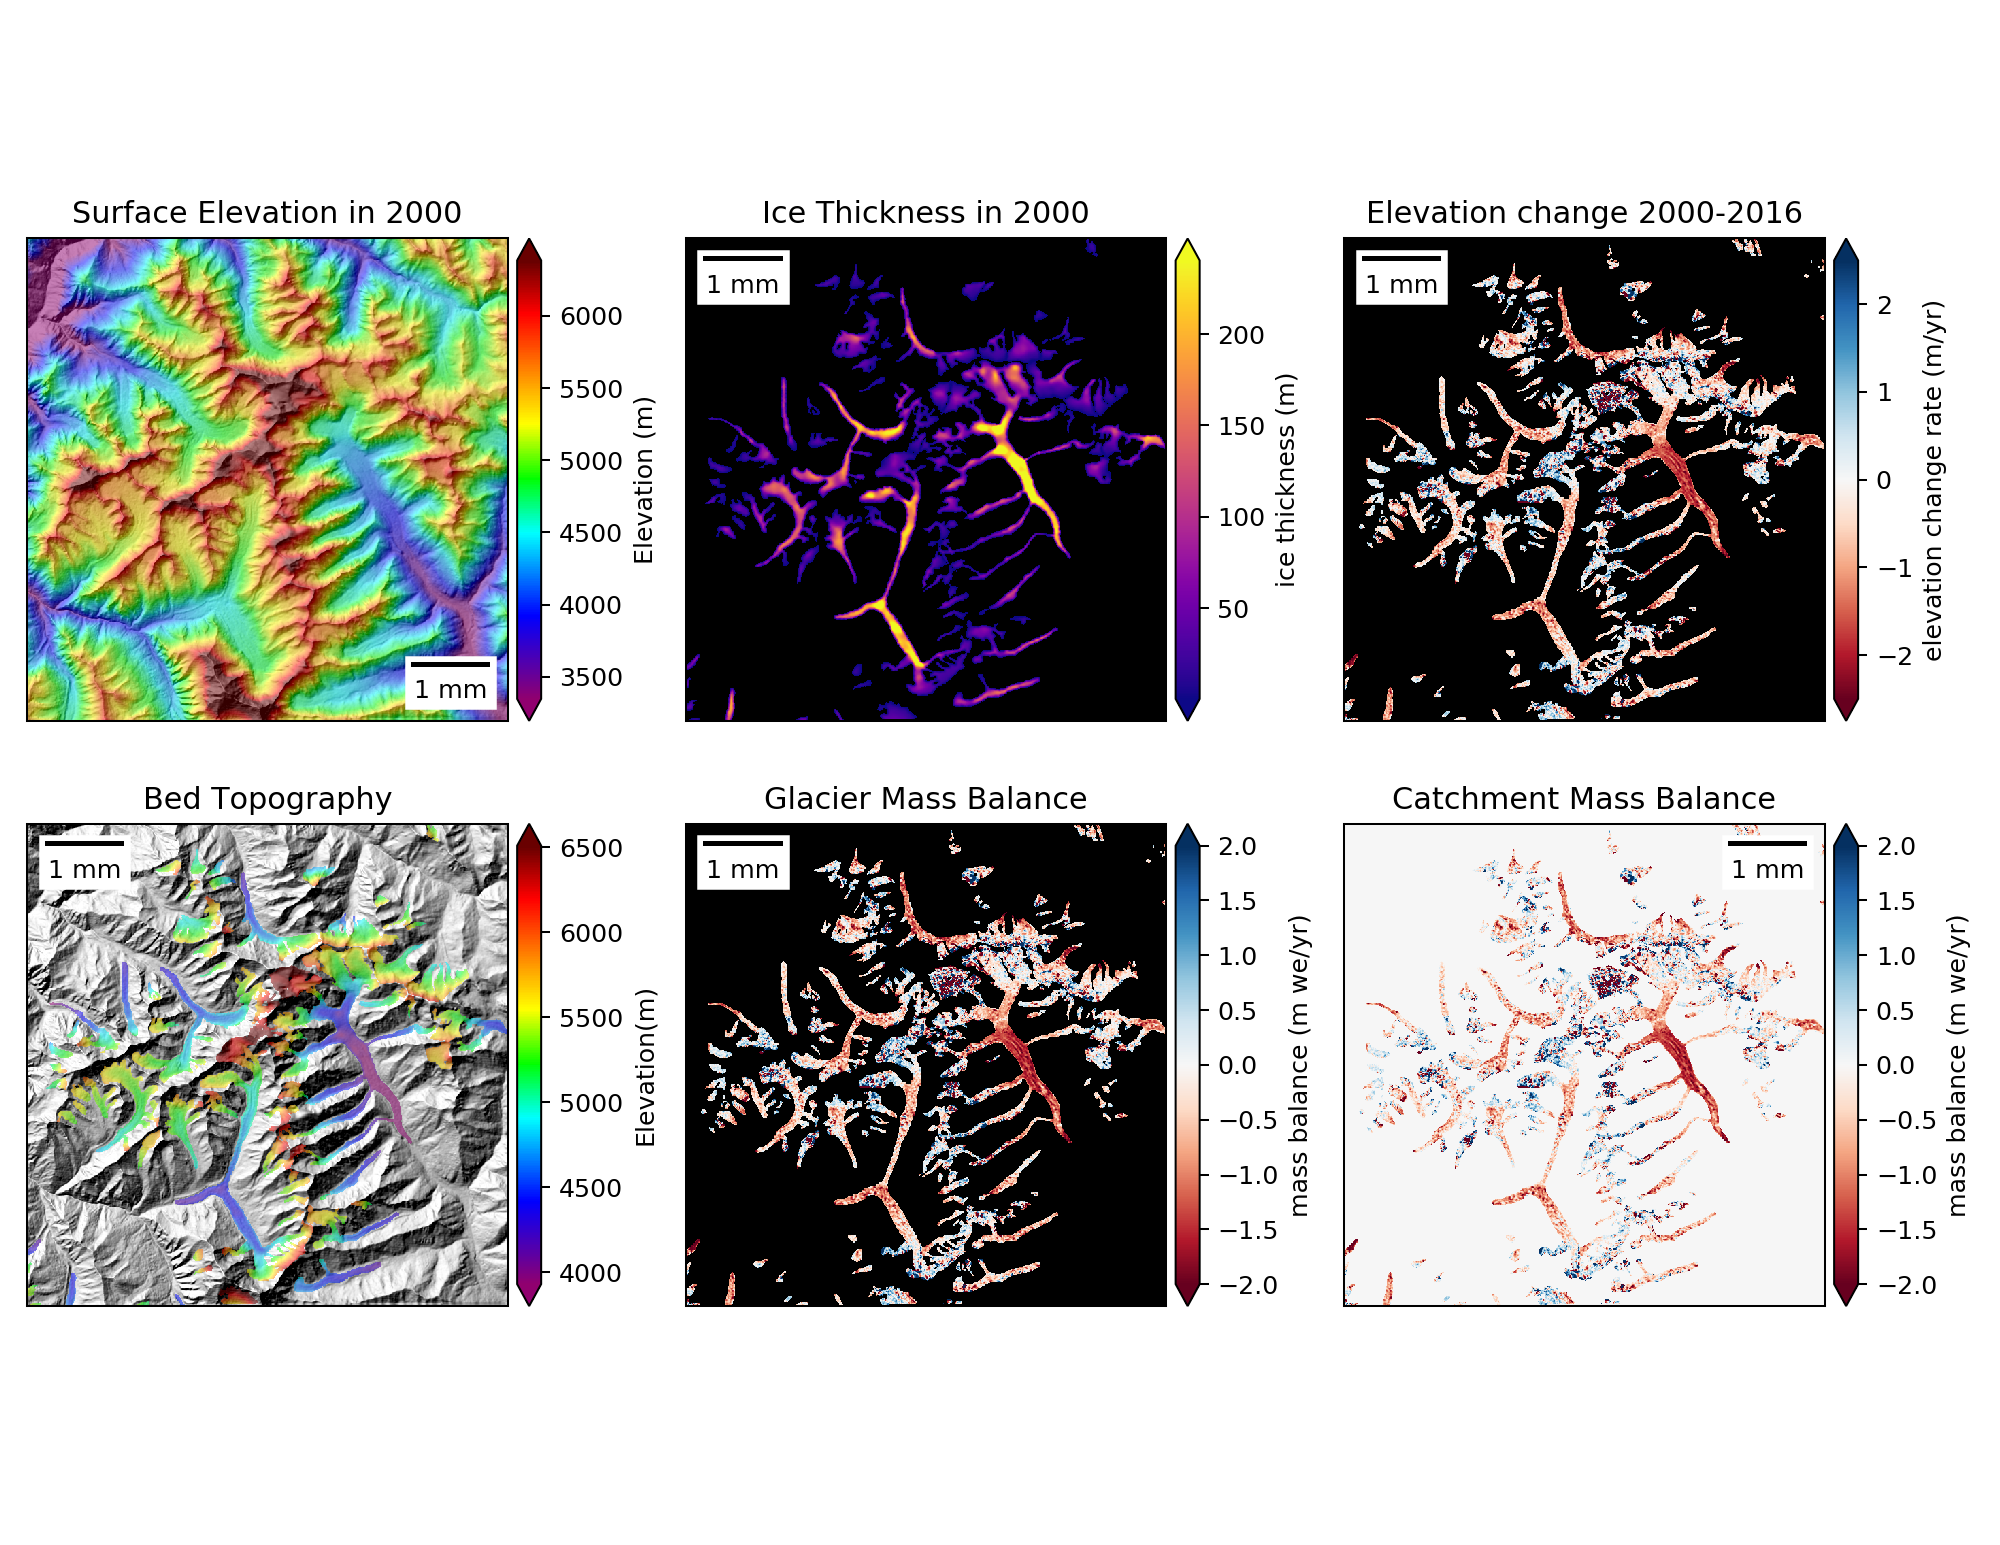

In [40]:
#converting elevation change in m/yr to mass change in mwe/yr
#Assuming all mass lost in form of ice, thus use a constant density of 850 kg/m3
mass_balance = ma_list[2]*0.85
#converting all the three arrays to normal arrays
#subtracting the ice thickness from DEM elevation to get bed topography
S = ma_list[0].filled(0) #Surface Elevation (m)
ice_thickness = ma_list[1].filled(0) #ice thickness (m)
B = S - ice_thickness #Bed elevation (m)
b_dot = mass_balance.filled(0) #mass balance (m.w.e./yr)
#plotting the inputs
fig,ax = plt.subplots(2,3,figsize=(11,8.5))
pltlib.iv(ma_list[0],ax=ax[0,0],ds=ds_list[0],title='Surface Elevation in 2000',label='Elevation (m)',hillshade=True)
pltlib.iv(ma_list[1],ax=ax[0,1],ds=ds_list[1],title='Ice Thickness in 2000',label='ice thickness (m)',cmap ='plasma')
pltlib.iv(ma_list[2],ax=ax[0,2],ds=ds_list[0],title='Elevation change 2000-2016',label='elevation change rate (m/yr)',clim=(-2.5,2.5),cmap='RdBu')
pltlib.iv(ma_list[0]-ma_list[1],ax=ax[1,0],ds=ds_list[0],title='Bed Topography',label='Elevation(m)',hillshade=True)
pltlib.iv(mass_balance,ax=ax[1,1],ds=ds_list[2],title='Glacier Mass Balance',label='mass balance (m we/yr)',clim = (-2,2), cmap = 'RdBu')
pltlib.iv(mass_balance.filled(0),ax=ax[1,2],ds = ds_list[0],title='Catchment Mass Balance',label='mass balance (m we/yr)',clim = (-2,2), cmap = 'RdBu')
plt.tight_layout()
fig.savefig('Model_input_negative_elevation.png',dpi=300)

In [20]:
def flatten(B,b_dot,S,zero_thickness=True):
    ### flatten two dimensional matrix
    S = S.T.flatten()
    #B[np.isnan(B)] = 0
    if zero_thickness:
        B = S #Bed is forced to be same as Surface elevation
    else:
        B = B.T.flatten() #Bed is changed to surface-ice elevation as already calculated
    b_dot = b_dot.T.flatten()
    return B,b_dot,S

In [24]:
#Model Parameters foir assuming zero initial ice present, ie., S = B
nx = np.shape(ma_list[0])[1]
ny = np.shape(ma_list[0])[0]
dx = ds_list[0].GetGeoTransform()[1]
dt = 0.08333 #years, monthly time steps
t = 0 #years
t_STOP = 100 #years
B,b_dot,S = flatten(B,b_dot,S,zero_thickness=False)
dictionary1 = {'S':S,'B':B,'b_dot':b_dot,'dt':dt,'t_STOP':t_STOP,'t':t,'dx':dx,'nx':nx,'ny':ny}
grid1 = RasterModelGrid(nx,ny,dx)

In [28]:
#Run the model
gla = glacier.Glacier(grid1,dictionary1)
gla.recursive_steps()

BKS: At t=    0.08 yr ALPHA_I=21.15% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=    0.17 yr ALPHA_I=21.13% and maxima are: H(324749) = 404.709961 			S(206566)=7803.958496

BKS: At t=    0.25 yr ALPHA_I=21.12% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=    0.33 yr ALPHA_I=21.10% and maxima are: H(324749) = 403.619141 			S(206566)=7803.958496

BKS: At t=    0.42 yr ALPHA_I=21.08% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=    0.50 yr ALPHA_I=21.06% and maxima are: H(324749) = 403.243652 			S(206566)=7803.958496

BKS: At t=    0.58 yr ALPHA_I=21.05% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=    0.67 yr ALPHA_I=21.03% and maxima are: H(324749) = 403.005859 			S(206566)=7803.958496

BKS: At t=    0.75 yr ALPHA_I=21.02% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=    0.83 yr ALPHA_I=21.00% and maxima are: H(324749) = 40

BKS: At t=    6.75 yr ALPHA_I=20.31% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=    6.83 yr ALPHA_I=20.29% and maxima are: H(324749) = 392.346680 			S(206566)=7803.958496

BKS: At t=    6.92 yr ALPHA_I=20.29% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=    7.00 yr ALPHA_I=20.28% and maxima are: H(324749) = 392.145508 			S(206566)=7803.958496

BKS: At t=    7.08 yr ALPHA_I=20.28% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=    7.17 yr ALPHA_I=20.26% and maxima are: H(324749) = 391.955078 			S(206566)=7803.958496

BKS: At t=    7.25 yr ALPHA_I=20.26% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=    7.33 yr ALPHA_I=20.25% and maxima are: H(324749) = 391.769531 			S(206566)=7803.958496

BKS: At t=    7.42 yr ALPHA_I=20.25% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=    7.50 yr ALPHA_I=20.24% and maxima are: H(324749) = 39

BKS: At t=   13.42 yr ALPHA_I=19.94% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   13.50 yr ALPHA_I=19.94% and maxima are: H(324749) = 388.897461 			S(206566)=7803.958496

BKS: At t=   13.58 yr ALPHA_I=19.94% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   13.67 yr ALPHA_I=19.93% and maxima are: H(324749) = 388.860352 			S(206566)=7803.958496

BKS: At t=   13.75 yr ALPHA_I=19.94% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   13.83 yr ALPHA_I=19.93% and maxima are: H(324749) = 388.827637 			S(206566)=7803.958496

BKS: At t=   13.92 yr ALPHA_I=19.93% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   14.00 yr ALPHA_I=19.93% and maxima are: H(324749) = 388.790527 			S(206566)=7803.958496

BKS: At t=   14.08 yr ALPHA_I=19.93% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   14.17 yr ALPHA_I=19.92% and maxima are: H(324749) = 38

BKS: At t=   20.08 yr ALPHA_I=19.78% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   20.17 yr ALPHA_I=19.78% and maxima are: H(324749) = 386.514648 			S(206566)=7803.958496

BKS: At t=   20.25 yr ALPHA_I=19.78% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   20.33 yr ALPHA_I=19.77% and maxima are: H(324749) = 386.448242 			S(206566)=7803.958496

BKS: At t=   20.42 yr ALPHA_I=19.78% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   20.50 yr ALPHA_I=19.77% and maxima are: H(324749) = 386.381836 			S(206566)=7803.958496

BKS: At t=   20.58 yr ALPHA_I=19.78% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   20.67 yr ALPHA_I=19.77% and maxima are: H(324749) = 386.318848 			S(206566)=7803.958496

BKS: At t=   20.75 yr ALPHA_I=19.77% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   20.83 yr ALPHA_I=19.77% and maxima are: H(324749) = 38

BKS: At t=   26.75 yr ALPHA_I=19.77% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   26.83 yr ALPHA_I=19.76% and maxima are: H(324749) = 385.303711 			S(206566)=7803.958496

BKS: At t=   26.92 yr ALPHA_I=19.77% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   27.00 yr ALPHA_I=19.76% and maxima are: H(324749) = 385.294922 			S(206566)=7803.958496

BKS: At t=   27.08 yr ALPHA_I=19.77% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   27.17 yr ALPHA_I=19.77% and maxima are: H(324749) = 385.285156 			S(206566)=7803.958496

BKS: At t=   27.25 yr ALPHA_I=19.77% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   27.33 yr ALPHA_I=19.76% and maxima are: H(324749) = 385.275879 			S(206566)=7803.958496

BKS: At t=   27.42 yr ALPHA_I=19.77% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   27.50 yr ALPHA_I=19.76% and maxima are: H(324749) = 38

BKS: At t=   33.42 yr ALPHA_I=19.81% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   33.50 yr ALPHA_I=19.81% and maxima are: H(324749) = 384.905273 			S(206566)=7803.958496

BKS: At t=   33.58 yr ALPHA_I=19.82% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   33.67 yr ALPHA_I=19.82% and maxima are: H(324749) = 384.892578 			S(206566)=7803.958496

BKS: At t=   33.75 yr ALPHA_I=19.82% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   33.83 yr ALPHA_I=19.82% and maxima are: H(324749) = 384.877441 			S(206566)=7803.958496

BKS: At t=   33.92 yr ALPHA_I=19.82% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   34.00 yr ALPHA_I=19.82% and maxima are: H(324749) = 384.869141 			S(206566)=7803.958496

BKS: At t=   34.08 yr ALPHA_I=19.83% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   34.17 yr ALPHA_I=19.82% and maxima are: H(324749) = 38

BKS: At t=   40.08 yr ALPHA_I=19.91% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   40.17 yr ALPHA_I=19.91% and maxima are: H(324749) = 385.186523 			S(206566)=7803.958496

BKS: At t=   40.25 yr ALPHA_I=19.92% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   40.33 yr ALPHA_I=19.91% and maxima are: H(324749) = 385.208008 			S(206566)=7803.958496

BKS: At t=   40.42 yr ALPHA_I=19.91% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   40.50 yr ALPHA_I=19.91% and maxima are: H(324749) = 385.226074 			S(206566)=7803.958496

BKS: At t=   40.58 yr ALPHA_I=19.92% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   40.67 yr ALPHA_I=19.92% and maxima are: H(324749) = 385.243652 			S(206566)=7803.958496

BKS: At t=   40.75 yr ALPHA_I=19.92% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   40.83 yr ALPHA_I=19.92% and maxima are: H(324749) = 38

BKS: At t=   46.75 yr ALPHA_I=20.02% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   46.83 yr ALPHA_I=20.01% and maxima are: H(324749) = 385.823242 			S(206566)=7803.958496

BKS: At t=   46.91 yr ALPHA_I=20.02% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   47.00 yr ALPHA_I=20.02% and maxima are: H(324749) = 385.834961 			S(206566)=7803.958496

BKS: At t=   47.08 yr ALPHA_I=20.02% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   47.16 yr ALPHA_I=20.02% and maxima are: H(324749) = 385.845215 			S(206566)=7803.958496

BKS: At t=   47.25 yr ALPHA_I=20.03% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   47.33 yr ALPHA_I=20.03% and maxima are: H(324749) = 385.855469 			S(206566)=7803.958496

BKS: At t=   47.41 yr ALPHA_I=20.03% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   47.50 yr ALPHA_I=20.03% and maxima are: H(324749) = 38

BKS: At t=   53.41 yr ALPHA_I=20.15% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   53.50 yr ALPHA_I=20.15% and maxima are: H(324749) = 386.159180 			S(206566)=7803.958496

BKS: At t=   53.58 yr ALPHA_I=20.16% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   53.66 yr ALPHA_I=20.15% and maxima are: H(324749) = 386.161621 			S(206566)=7803.958496

BKS: At t=   53.75 yr ALPHA_I=20.16% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   53.83 yr ALPHA_I=20.16% and maxima are: H(324749) = 386.165527 			S(206566)=7803.958496

BKS: At t=   53.91 yr ALPHA_I=20.16% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   54.00 yr ALPHA_I=20.16% and maxima are: H(324749) = 386.171875 			S(206566)=7803.958496

BKS: At t=   54.08 yr ALPHA_I=20.17% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   54.16 yr ALPHA_I=20.16% and maxima are: H(324749) = 38

BKS: At t=   60.08 yr ALPHA_I=20.30% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   60.16 yr ALPHA_I=20.29% and maxima are: H(324749) = 386.251953 			S(206566)=7803.958496

BKS: At t=   60.25 yr ALPHA_I=20.30% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   60.33 yr ALPHA_I=20.30% and maxima are: H(324749) = 386.250977 			S(206566)=7803.958496

BKS: At t=   60.41 yr ALPHA_I=20.31% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   60.50 yr ALPHA_I=20.31% and maxima are: H(324749) = 386.251953 			S(206566)=7803.958496

BKS: At t=   60.58 yr ALPHA_I=20.31% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   60.66 yr ALPHA_I=20.31% and maxima are: H(324749) = 386.257812 			S(206566)=7803.958496

BKS: At t=   60.75 yr ALPHA_I=20.31% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   60.83 yr ALPHA_I=20.31% and maxima are: H(324749) = 38

BKS: At t=   66.75 yr ALPHA_I=20.46% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   66.83 yr ALPHA_I=20.45% and maxima are: H(324749) = 386.278320 			S(206566)=7803.958496

BKS: At t=   66.91 yr ALPHA_I=20.46% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   67.00 yr ALPHA_I=20.46% and maxima are: H(324749) = 386.277344 			S(206566)=7803.958496

BKS: At t=   67.08 yr ALPHA_I=20.47% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   67.16 yr ALPHA_I=20.46% and maxima are: H(324749) = 386.281250 			S(206566)=7803.958496

BKS: At t=   67.25 yr ALPHA_I=20.47% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   67.33 yr ALPHA_I=20.47% and maxima are: H(324749) = 386.281250 			S(206566)=7803.958496

BKS: At t=   67.41 yr ALPHA_I=20.48% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   67.50 yr ALPHA_I=20.47% and maxima are: H(324749) = 38

BKS: At t=   73.41 yr ALPHA_I=20.61% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   73.50 yr ALPHA_I=20.61% and maxima are: H(324749) = 386.279297 			S(206566)=7803.958496

BKS: At t=   73.58 yr ALPHA_I=20.62% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   73.66 yr ALPHA_I=20.61% and maxima are: H(324749) = 386.281738 			S(206566)=7803.958496

BKS: At t=   73.75 yr ALPHA_I=20.62% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   73.83 yr ALPHA_I=20.62% and maxima are: H(324749) = 386.281250 			S(206566)=7803.958496

BKS: At t=   73.91 yr ALPHA_I=20.62% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   74.00 yr ALPHA_I=20.62% and maxima are: H(324749) = 386.283203 			S(206566)=7803.958496

BKS: At t=   74.08 yr ALPHA_I=20.63% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   74.16 yr ALPHA_I=20.62% and maxima are: H(324749) = 38

BKS: At t=   80.08 yr ALPHA_I=20.75% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   80.16 yr ALPHA_I=20.75% and maxima are: H(324749) = 386.323730 			S(206566)=7803.958496

BKS: At t=   80.25 yr ALPHA_I=20.76% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   80.33 yr ALPHA_I=20.75% and maxima are: H(324749) = 386.332031 			S(206566)=7803.958496

BKS: At t=   80.41 yr ALPHA_I=20.76% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   80.50 yr ALPHA_I=20.76% and maxima are: H(324749) = 386.333008 			S(206566)=7803.958496

BKS: At t=   80.58 yr ALPHA_I=20.76% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   80.66 yr ALPHA_I=20.76% and maxima are: H(324749) = 386.332031 			S(206566)=7803.958496

BKS: At t=   80.75 yr ALPHA_I=20.77% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   80.83 yr ALPHA_I=20.76% and maxima are: H(324749) = 38

BKS: At t=   86.75 yr ALPHA_I=20.89% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   86.83 yr ALPHA_I=20.89% and maxima are: H(324749) = 386.495605 			S(206566)=7803.958496

BKS: At t=   86.91 yr ALPHA_I=20.90% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   87.00 yr ALPHA_I=20.89% and maxima are: H(324749) = 386.500488 			S(206566)=7803.958496

BKS: At t=   87.08 yr ALPHA_I=20.90% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   87.16 yr ALPHA_I=20.90% and maxima are: H(324749) = 386.509277 			S(206566)=7803.958496

BKS: At t=   87.25 yr ALPHA_I=20.90% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   87.33 yr ALPHA_I=20.90% and maxima are: H(324749) = 386.516113 			S(206566)=7803.958496

BKS: At t=   87.41 yr ALPHA_I=20.90% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   87.50 yr ALPHA_I=20.90% and maxima are: H(324749) = 38

BKS: At t=   93.41 yr ALPHA_I=21.04% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   93.50 yr ALPHA_I=21.04% and maxima are: H(324749) = 386.793945 			S(206566)=7803.958496

BKS: At t=   93.58 yr ALPHA_I=21.04% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   93.66 yr ALPHA_I=21.04% and maxima are: H(324749) = 386.803711 			S(206566)=7803.958496

BKS: At t=   93.75 yr ALPHA_I=21.05% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   93.83 yr ALPHA_I=21.04% and maxima are: H(324749) = 386.815918 			S(206566)=7803.958496

BKS: At t=   93.91 yr ALPHA_I=21.05% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   94.00 yr ALPHA_I=21.05% and maxima are: H(324749) = 386.824219 			S(206566)=7803.958496

BKS: At t=   94.08 yr ALPHA_I=21.06% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   94.16 yr ALPHA_I=21.05% and maxima are: H(324749) = 38

BKS: At t=  100.08 yr ALPHA_I=21.19% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

main(): Output stored in file "S_map.txt" at time 11:00:01 



In [29]:
S_map = gla.grid['node']['ice_elevation'] 	### ice surface elevation matrix
H_map = gla.grid['node']['ice_thickness']	### ice thickness matrix
I_map = gla.grid['node']['I_map'] ### ice mask matrix
S_map = (S_map.reshape(np.shape(ma_list[0])))
H_map = (H_map.reshape(np.shape(ma_list[0])))
I_map = (I_map.reshape((np.shape(ma_list[0]))))


<IPython.core.display.Javascript object>


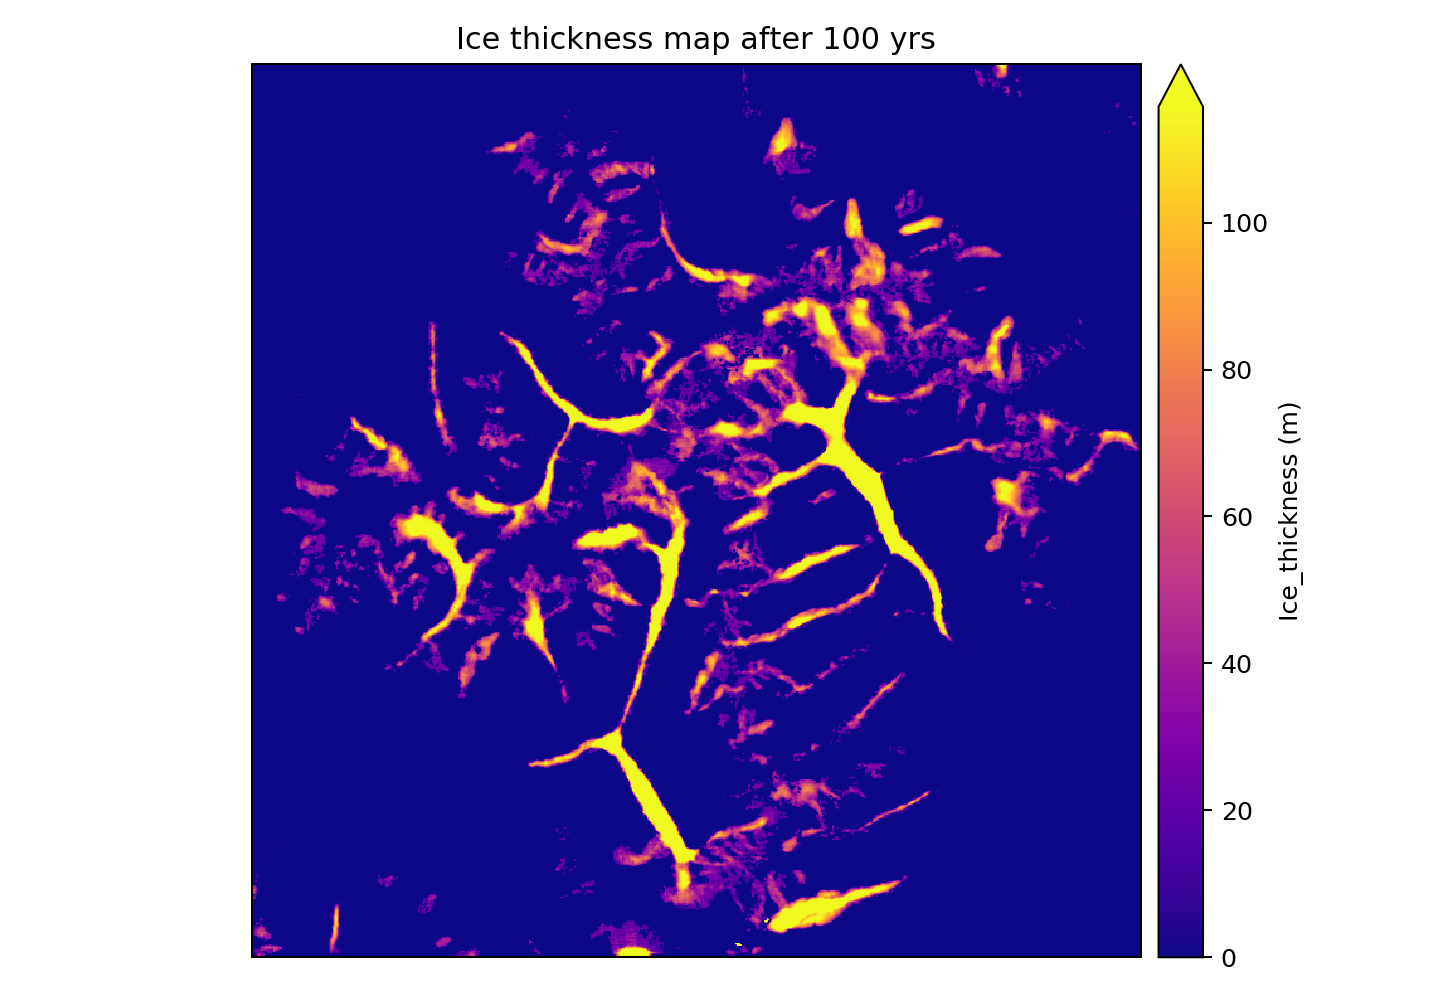

In [30]:
ig,ax=plt.subplots(figsize=(8,5.5))
#ax.imshow(H_map)
pltlib.iv(H_map,ax=ax,cmap='plasma',label='Ice_thickness (m)', title='Ice thickness map after 100 yrs')

<IPython.core.display.Javascript object>


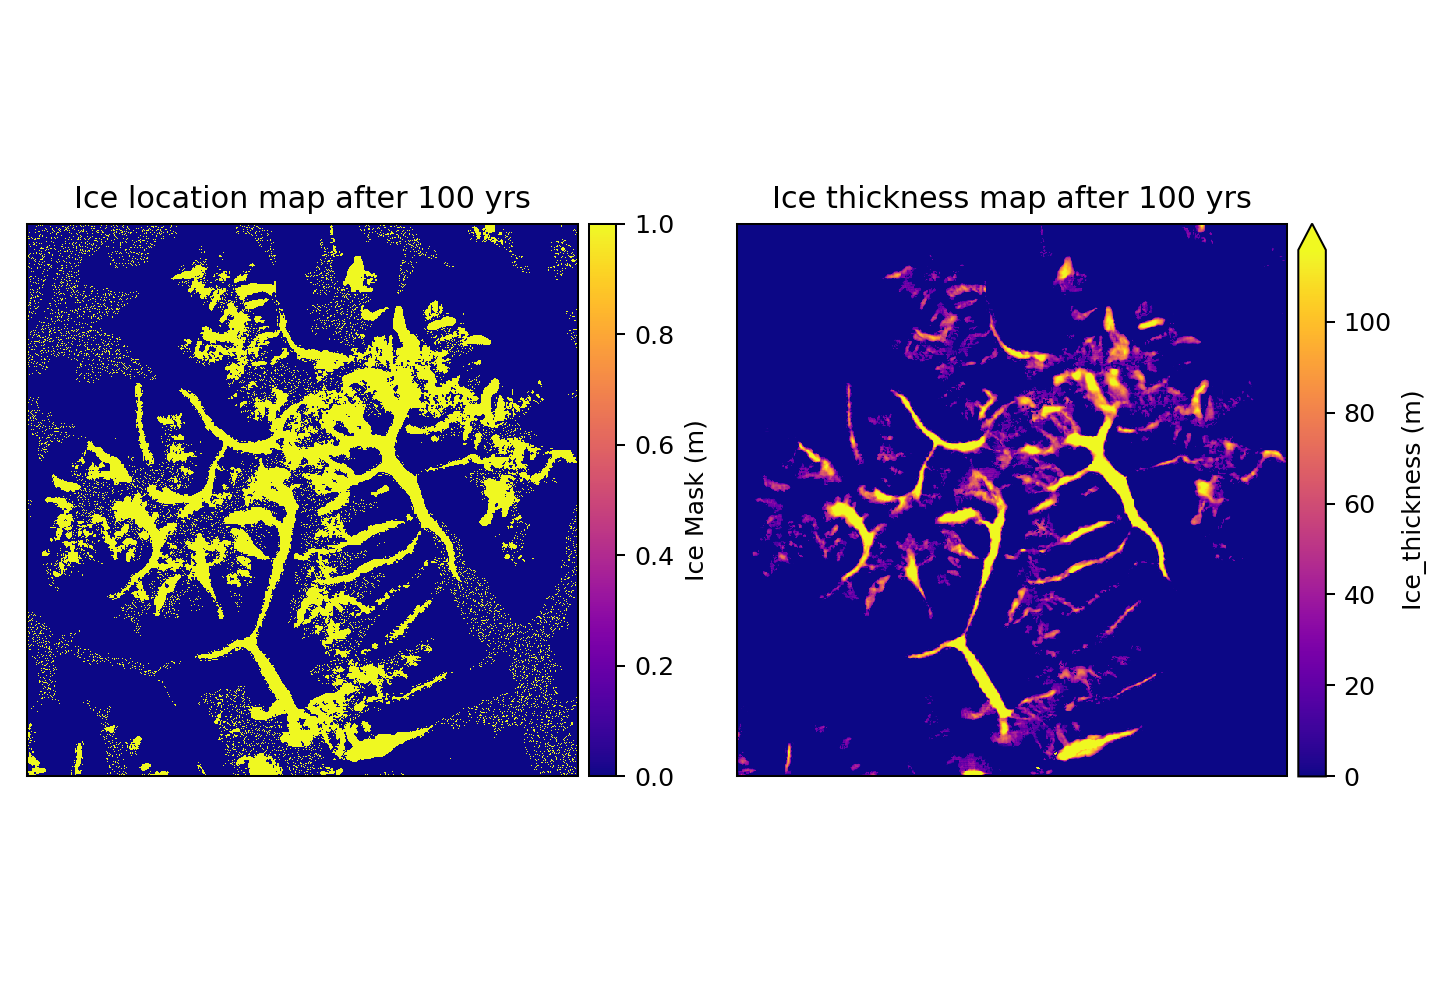

In [42]:
fig,ax=plt.subplots(1,2,figsize=(8,5.5))
#ax.imshow(H_map)
pltlib.iv(I_map,ax=ax[0],cmap='plasma',label='Ice Mask (m)', title='Ice location map after 100 yrs')
pltlib.iv(H_map,ax=ax[1],cmap='plasma',label='Ice_thickness (m)', title='Ice thickness map after 100 yrs')
fig.savefig('Ice_thickness_ice_mask_run3.png',dpi=300)

<IPython.core.display.Javascript object>


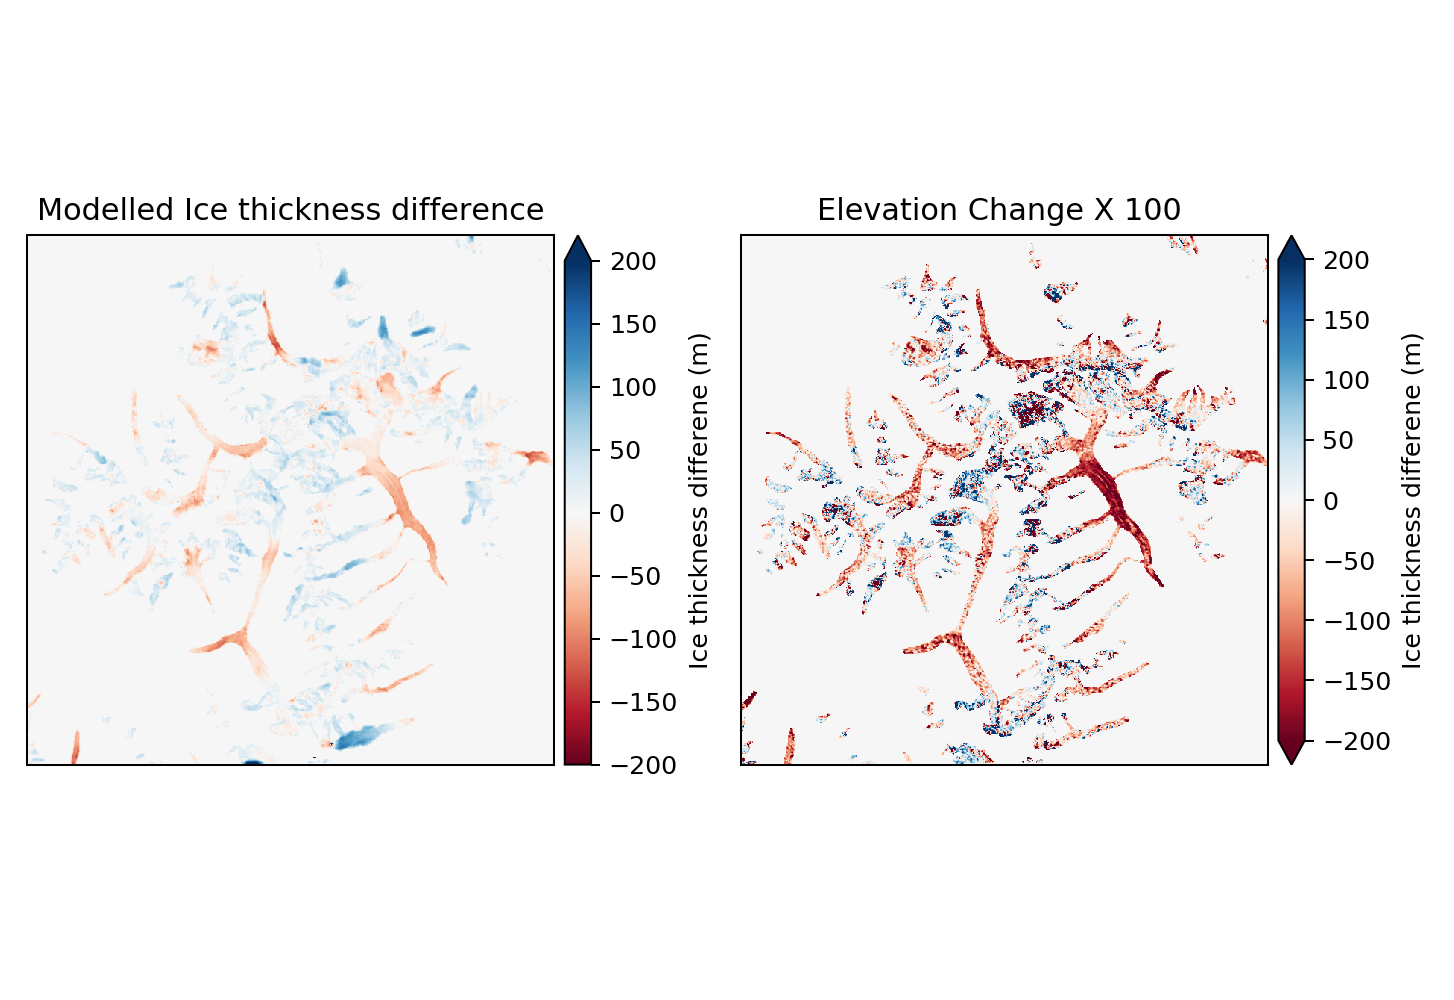

In [49]:
fig,ax=plt.subplots(1,2,figsize=(8,5.5))
#ax.imshow(H_map)
pltlib.iv(H_map-ice_thickness,ax=ax[0],label='Ice thickness differene (m)', title='Modelled Ice thickness difference',cmap='RdBu',clim=(-200,200))
pltlib.iv((ma_list[2]*100).filled(0),ax=ax[1],label='Ice thickness differene (m)', title='Elevation Change X 100 ',cmap='RdBu',clim=(-200,200))
plt.tight_layout()
fig.savefig('Modelled_vs_elevation_change.png',dpi=300)